# Goals
This notebook contains an analysis on some NBA data. The goal of this analysis was to determine what stat categories the past 20 NBA champions had in common. I also examined if a specific stat was significant to winning a championship, the rivalry between the Celtics and Lakers and some year-over-year data.

# Data
The data was downloaded from Kaggle: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Team+Stats+Per+Game.csv

First, import libraries and load datasets.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

team_stats = pd.read_csv("Documents/archive/Team Stats Per Game.csv")
team_summaries = pd.read_csv("Documents/archive/Team Summaries.csv")
opp_stats = pd.read_csv("Documents/archive/Opponent Stats Per Game.csv")
champions = pd.read_csv("Documents/archive/Complete_NBA_Champions_List.csv")

Merge the champions dataframe with the other dataframes.

In [6]:
team_stats = team_stats.merge(champions, on=['season','lg','team','abbreviation'], how='left').sort_values(by='season')
team_summaries = pd.merge(team_summaries, champions, on=['season','lg','team','abbreviation'], how='left').sort_values(by='season')
opp_stats = opp_stats.merge(champions, on=['season','lg','team','abbreviation'], how='left').sort_values(by='season')
print(champions)

    season   lg                   team abbreviation  champion
0     1947  BAA  Philadelphia Warriors          PHW      True
1     1948  BAA      Baltimore Bullets          BLB      True
2     1949  BAA     Minneapolis Lakers          MNL      True
3     1950  NBA     Minneapolis Lakers          MNL      True
4     1951  NBA       Rochester Royals          ROC      True
..     ...  ...                    ...          ...       ...
73    2020  NBA     Los Angeles Lakers          LAL      True
74    2021  NBA        Milwaukee Bucks          MIL      True
75    2022  NBA  Golden State Warriors          GSW      True
76    2023  NBA         Denver Nuggets          DEN      True
77    2024  NBA         Boston Celtics          BOS      True

[78 rows x 5 columns]


Next, let's take a closer look at the unique teams in team_stats from 2005 - 2024.

In [8]:
team_stats_counts = team_stats[team_stats['season'] >= 2005]['team'].value_counts()
print(team_stats_counts)

team
Los Angeles Clippers                 21
League Average                       21
Phoenix Suns                         21
Minnesota Timberwolves               21
New York Knicks                      21
Orlando Magic                        21
Philadelphia 76ers                   21
Milwaukee Bucks                      21
Portland Trail Blazers               21
Sacramento Kings                     21
San Antonio Spurs                    21
Indiana Pacers                       21
Utah Jazz                            21
Washington Wizards                   21
Toronto Raptors                      21
Miami Heat                           21
Cleveland Cavaliers                  21
Houston Rockets                      21
Golden State Warriors                21
Detroit Pistons                      21
Memphis Grizzlies                    21
Chicago Bulls                        21
Denver Nuggets                       21
Boston Celtics                       21
Atlanta Hawks                      

We don't need League Average, so let's drop that value from the entire dataframe. Then let's look at the columns and other information.

In [10]:
team_stats = team_stats.drop(team_stats[team_stats['team'] == 'League Average'].index)
team_stats.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'fg_percent', 'x3p_per_game',
       'x3pa_per_game', 'x3p_percent', 'x2p_per_game', 'x2pa_per_game',
       'x2p_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'champion'],
      dtype='object')

In [11]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1788 entries, 1864 to 0
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         1788 non-null   int64  
 1   lg             1788 non-null   object 
 2   team           1788 non-null   object 
 3   abbreviation   1788 non-null   object 
 4   playoffs       1788 non-null   bool   
 5   g              1787 non-null   float64
 6   mp_per_game    1616 non-null   float64
 7   fg_per_game    1787 non-null   float64
 8   fga_per_game   1787 non-null   float64
 9   fg_percent     1787 non-null   float64
 10  x3p_per_game   1378 non-null   float64
 11  x3pa_per_game  1378 non-null   float64
 12  x3p_percent    1378 non-null   float64
 13  x2p_per_game   1787 non-null   float64
 14  x2pa_per_game  1787 non-null   float64
 15  x2p_percent    1787 non-null   float64
 16  ft_per_game    1787 non-null   float64
 17  fta_per_game   1787 non-null   float64
 18  ft_percent   

Now let's look at where the past 20 champions finished in points per game.

    season                   team  pts_per_game  top
0     2005      San Antonio Spurs          96.2   18
1     2006             Miami Heat          99.9    6
2     2007      San Antonio Spurs          98.5   14
3     2008         Boston Celtics         100.5   11
4     2009     Los Angeles Lakers         106.9    3
5     2010     Los Angeles Lakers         101.7   12
6     2011       Dallas Mavericks         100.2   11
7     2012             Miami Heat          98.5    7
8     2013             Miami Heat         102.9    5
9     2014      San Antonio Spurs         105.4    6
10    2015  Golden State Warriors         110.0    1
11    2016    Cleveland Cavaliers         104.3    8
12    2017  Golden State Warriors         115.9    1
13    2018  Golden State Warriors         113.5    1
14    2019        Toronto Raptors         114.4    8
15    2020     Los Angeles Lakers         113.4   11
16    2021        Milwaukee Bucks         120.1    1
17    2022  Golden State Warriors         111.

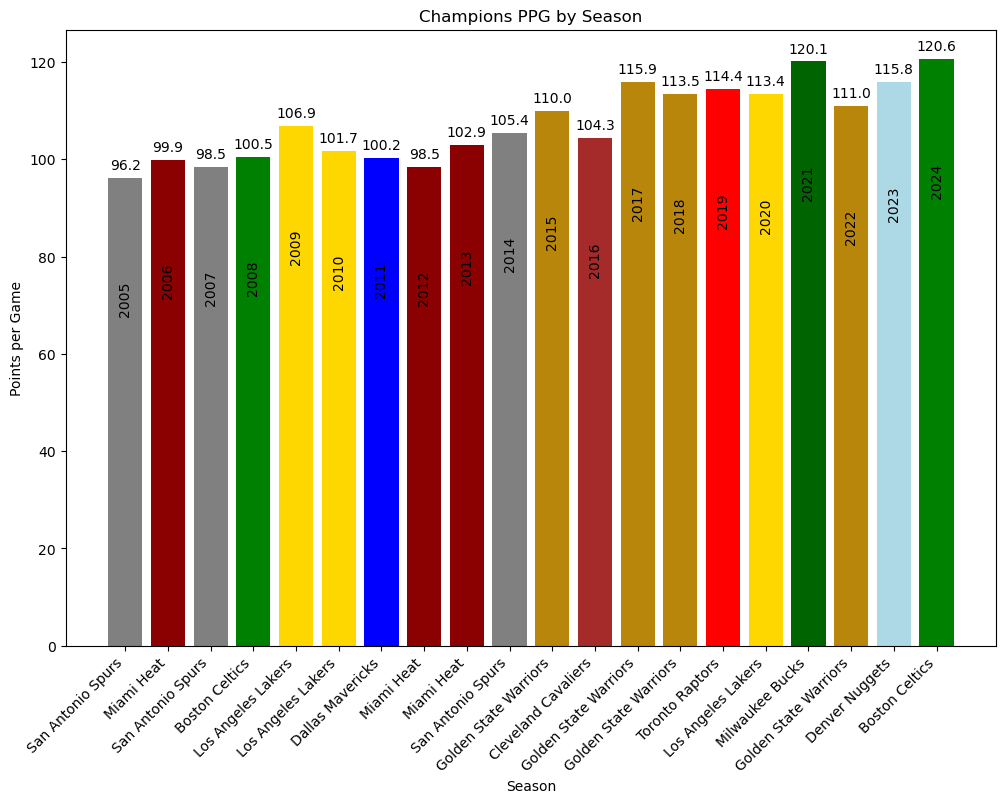

In [13]:
team_stats['top'] = (
    team_stats
    .groupby('season')['pts_per_game']
    .rank(ascending=False, method='min')
    .fillna(0)
    .astype(int)
)
champs = team_stats[
    (team_stats['champion']) &
    (team_stats['season'] >= 2005)
].copy()

print(champs[['season', 'team', 'pts_per_game', 'top']].reset_index(drop=True))

fig, ax = plt.subplots(figsize = (12,8))
colors = ['grey', 'darkred', 'grey', 'green', 'gold', 'gold', 'blue', 'darkred', 'darkred', 'grey', 'darkgoldenrod', 'brown',
         'darkgoldenrod', 'darkgoldenrod', 'red', 'gold', 'darkgreen', 'darkgoldenrod', 'lightblue', 'green']
bars = ax.bar(champs['season'], champs['pts_per_game'], color=colors)
ax.set_xticks(champs['season'])
ax.set_xticklabels((champs['team']), rotation=45, ha='right')
ax.bar_label(bars, labels=champs['season'], padding=-100, rotation=90)
ax.bar_label(bars, labels=champs['pts_per_game'], padding=4)
ax.set_xlabel('Season')
ax.set_ylabel('Points per Game')
ax.set_title('Champions PPG by Season')
plt.show()

Other than the 2005 San Antonio Spurs, all other champions finished in the top 15 in points per game. Next, let's look at other major stat categories.

    season                   team  fg_percent  top
0     2005      San Antonio Spurs       0.453   10
1     2006             Miami Heat       0.478    2
2     2007      San Antonio Spurs       0.474    2
3     2008         Boston Celtics       0.475    4
4     2009     Los Angeles Lakers       0.474    4
5     2010     Los Angeles Lakers       0.457   18
6     2011       Dallas Mavericks       0.475    4
7     2012             Miami Heat       0.469    4
8     2013             Miami Heat       0.496    1
9     2014      San Antonio Spurs       0.486    2
10    2015  Golden State Warriors       0.478    1
11    2016    Cleveland Cavaliers       0.460    9
12    2017  Golden State Warriors       0.495    1
13    2018  Golden State Warriors       0.503    1
14    2019        Toronto Raptors       0.474    5
15    2020     Los Angeles Lakers       0.480    1
16    2021        Milwaukee Bucks       0.487    3
17    2022  Golden State Warriors       0.469    8
18    2023         Denver Nugge

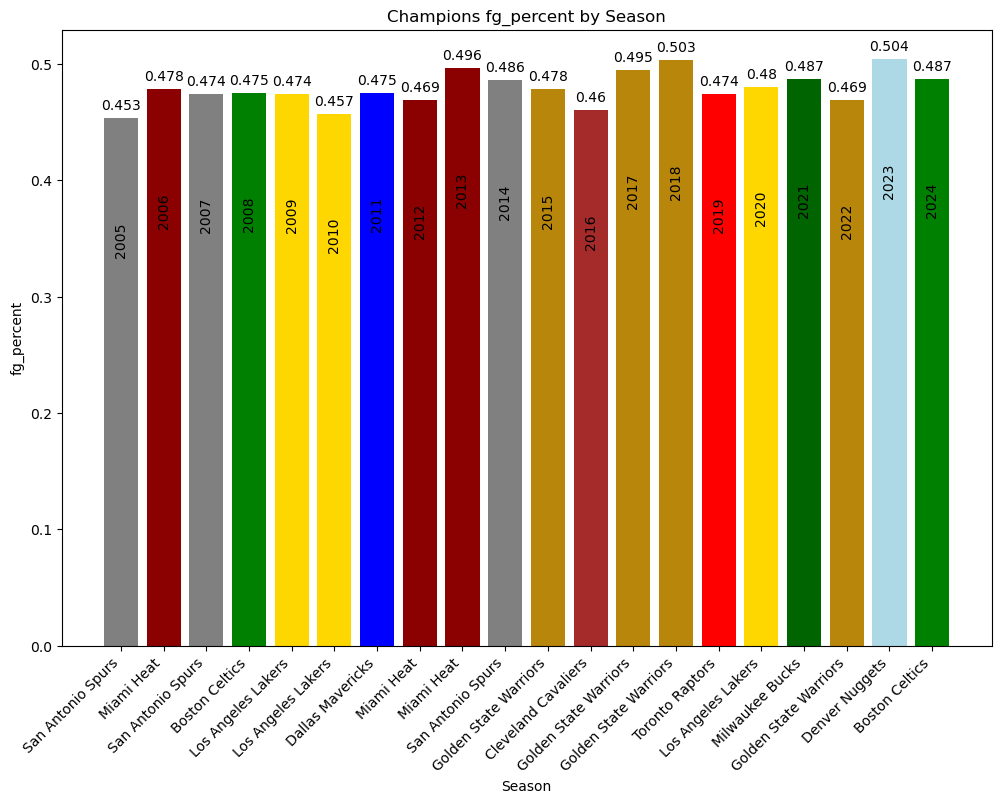

    season                   team  x3p_percent  top
0     2005      San Antonio Spurs        0.363    8
1     2006             Miami Heat        0.345   20
2     2007      San Antonio Spurs        0.381    3
3     2008         Boston Celtics        0.381    5
4     2009     Los Angeles Lakers        0.361   19
5     2010     Los Angeles Lakers        0.341   23
6     2011       Dallas Mavericks        0.365   11
7     2012             Miami Heat        0.359    9
8     2013             Miami Heat        0.396    2
9     2014      San Antonio Spurs        0.397    1
10    2015  Golden State Warriors        0.398    1
11    2016    Cleveland Cavaliers        0.362    7
12    2017  Golden State Warriors        0.383    3
13    2018  Golden State Warriors        0.391    1
14    2019        Toronto Raptors        0.366    6
15    2020     Los Angeles Lakers        0.349   21
16    2021        Milwaukee Bucks        0.389    4
17    2022  Golden State Warriors        0.364    7
18    2023  

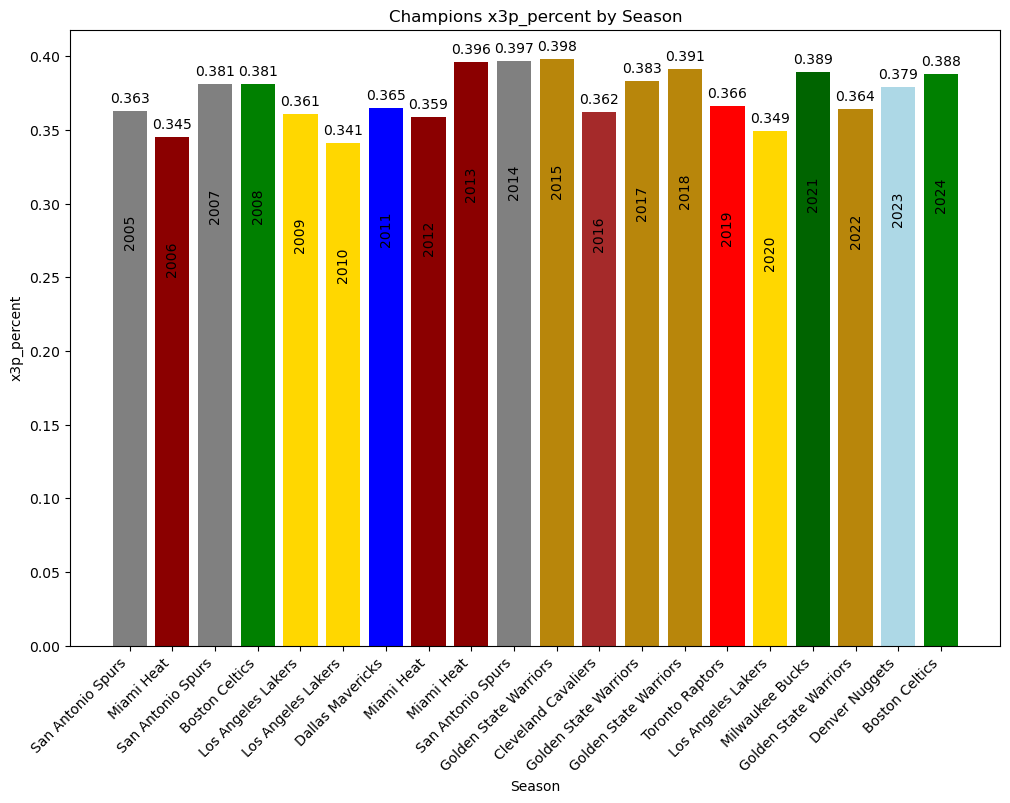

    season                   team  trb_per_game  top
0     2005      San Antonio Spurs          42.4   11
1     2006             Miami Heat          43.1    1
2     2007      San Antonio Spurs          40.7   16
3     2008         Boston Celtics          42.0   12
4     2009     Los Angeles Lakers          43.9    1
5     2010     Los Angeles Lakers          44.3    2
6     2011       Dallas Mavericks          41.4   14
7     2012             Miami Heat          41.6   21
8     2013             Miami Heat          38.6   30
9     2014      San Antonio Spurs          43.3   12
10    2015  Golden State Warriors          44.7    6
11    2016    Cleveland Cavaliers          44.5    9
12    2017  Golden State Warriors          44.4    7
13    2018  Golden State Warriors          43.5   17
14    2019        Toronto Raptors          45.2   17
15    2020     Los Angeles Lakers          45.7    9
16    2021        Milwaukee Bucks          48.1    2
17    2022  Golden State Warriors          45.

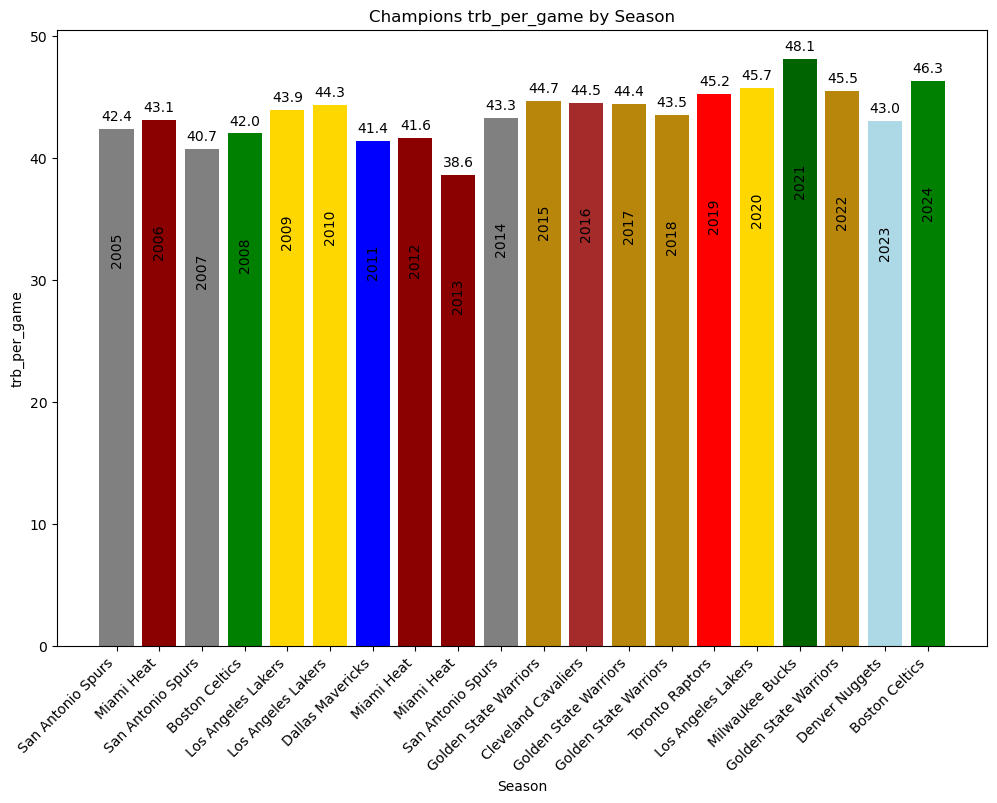

    season                   team  ast_per_game  top
0     2005      San Antonio Spurs          21.6   13
1     2006             Miami Heat          20.6   17
2     2007      San Antonio Spurs          22.1   11
3     2008         Boston Celtics          22.4    8
4     2009     Los Angeles Lakers          23.3    2
5     2010     Los Angeles Lakers          21.1   15
6     2011       Dallas Mavericks          23.8    1
7     2012             Miami Heat          20.0   20
8     2013             Miami Heat          23.0    7
9     2014      San Antonio Spurs          25.2    1
10    2015  Golden State Warriors          27.4    1
11    2016    Cleveland Cavaliers          22.7   13
12    2017  Golden State Warriors          30.4    1
13    2018  Golden State Warriors          29.3    1
14    2019        Toronto Raptors          25.4   13
15    2020     Los Angeles Lakers          25.4   10
16    2021        Milwaukee Bucks          25.5   12
17    2022  Golden State Warriors          27.

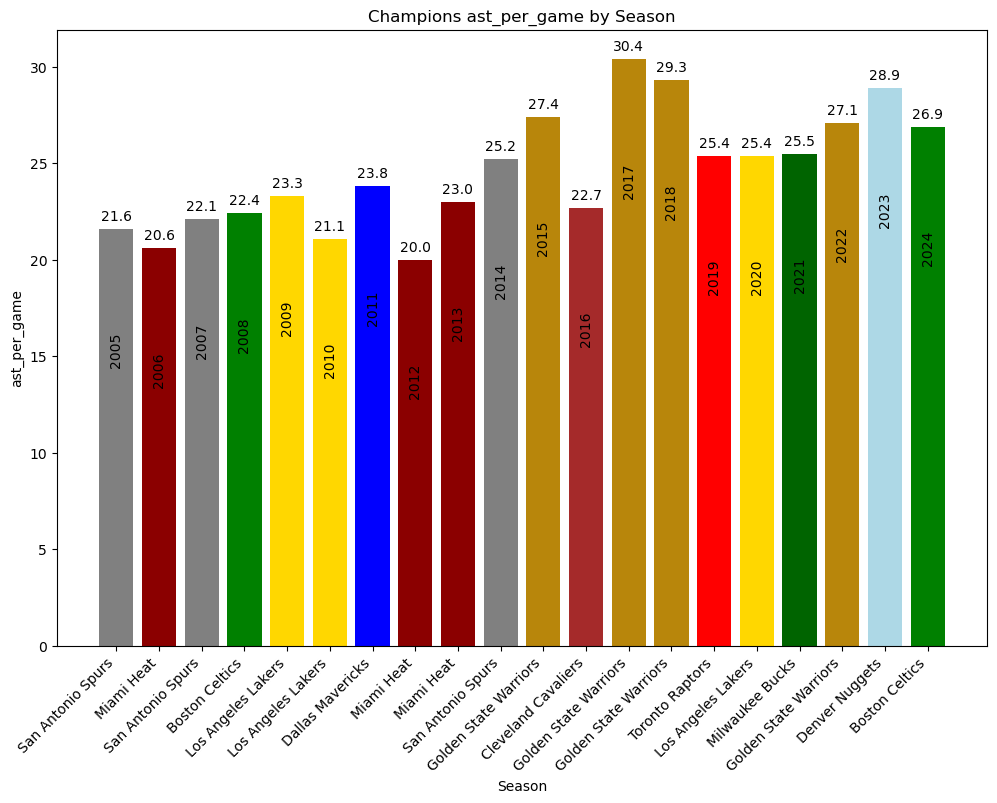

    season                   team  stl_per_game  top
0     2005      San Antonio Spurs           7.5   16
1     2006             Miami Heat           6.4   28
2     2007      San Antonio Spurs           7.2   13
3     2008         Boston Celtics           8.5    5
4     2009     Los Angeles Lakers           8.8    1
5     2010     Los Angeles Lakers           7.5   11
6     2011       Dallas Mavericks           6.8   23
7     2012             Miami Heat           8.9    3
8     2013             Miami Heat           8.7    3
9     2014      San Antonio Spurs           7.4   20
10    2015  Golden State Warriors           9.3    4
11    2016    Cleveland Cavaliers           6.7   27
12    2017  Golden State Warriors           9.6    1
13    2018  Golden State Warriors           8.0    8
14    2019        Toronto Raptors           8.3    6
15    2020     Los Angeles Lakers           8.6    5
16    2021        Milwaukee Bucks           8.1    7
17    2022  Golden State Warriors           8.

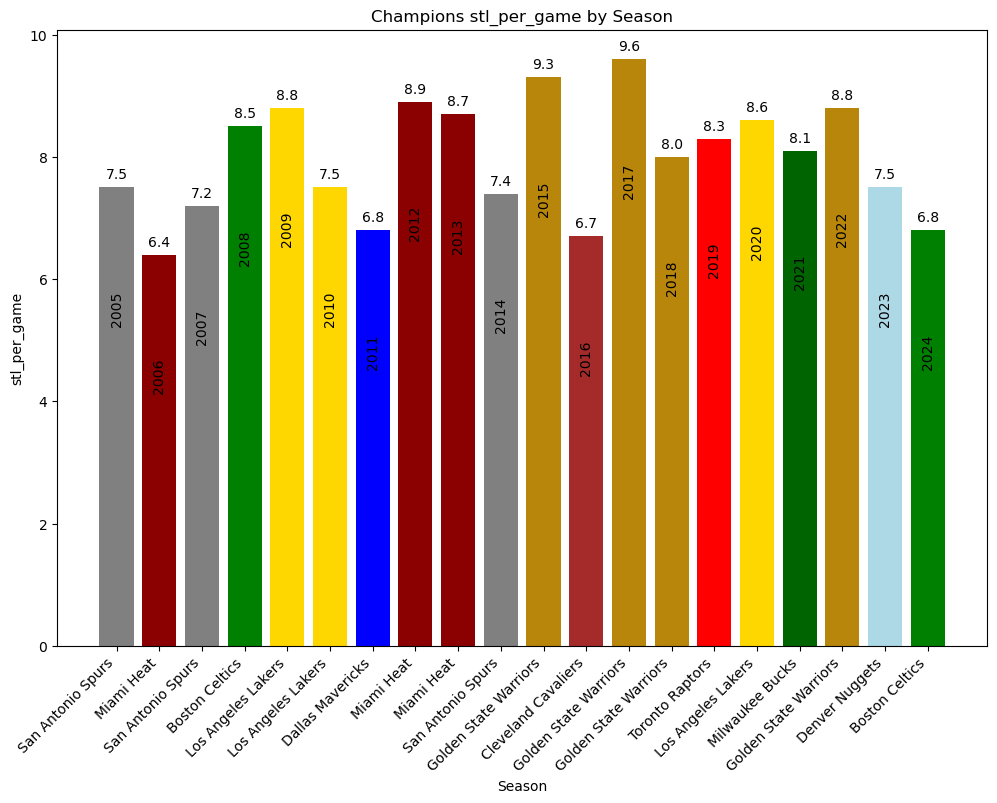

    season                   team  blk_per_game  top
0     2005      San Antonio Spurs           6.6    1
1     2006             Miami Heat           5.4    8
2     2007      San Antonio Spurs           5.1    9
3     2008         Boston Celtics           4.6   18
4     2009     Los Angeles Lakers           5.1   10
5     2010     Los Angeles Lakers           4.9   15
6     2011       Dallas Mavericks           4.3   23
7     2012             Miami Heat           5.4    9
8     2013             Miami Heat           5.4    9
9     2014      San Antonio Spurs           5.1    8
10    2015  Golden State Warriors           6.0    2
11    2016    Cleveland Cavaliers           3.9   26
12    2017  Golden State Warriors           6.8    1
13    2018  Golden State Warriors           7.5    1
14    2019        Toronto Raptors           5.3    9
15    2020     Los Angeles Lakers           6.6    1
16    2021        Milwaukee Bucks           4.6   19
17    2022  Golden State Warriors           4.

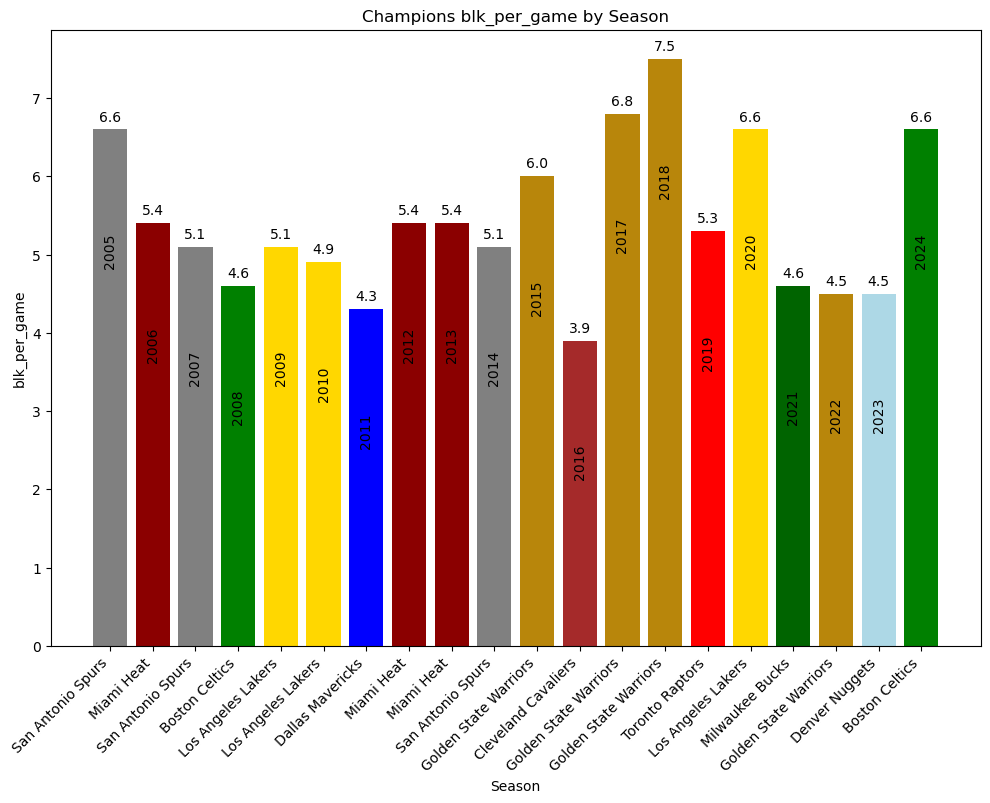

    season                   team  tov_per_game  top
0     2005      San Antonio Spurs          13.7    7
1     2006             Miami Heat          14.5   15
2     2007      San Antonio Spurs          13.9    4
3     2008         Boston Celtics          15.2   27
4     2009     Los Angeles Lakers          13.5   11
5     2010     Los Angeles Lakers          13.4    6
6     2011       Dallas Mavericks          14.0   12
7     2012             Miami Heat          15.2   21
8     2013             Miami Heat          13.9    4
9     2014      San Antonio Spurs          14.4   11
10    2015  Golden State Warriors          14.5   18
11    2016    Cleveland Cavaliers          13.6   10
12    2017  Golden State Warriors          14.8   22
13    2018  Golden State Warriors          15.5   26
14    2019        Toronto Raptors          14.0   14
15    2020     Los Angeles Lakers          15.2   22
16    2021        Milwaukee Bucks          13.8   15
17    2022  Golden State Warriors          14.

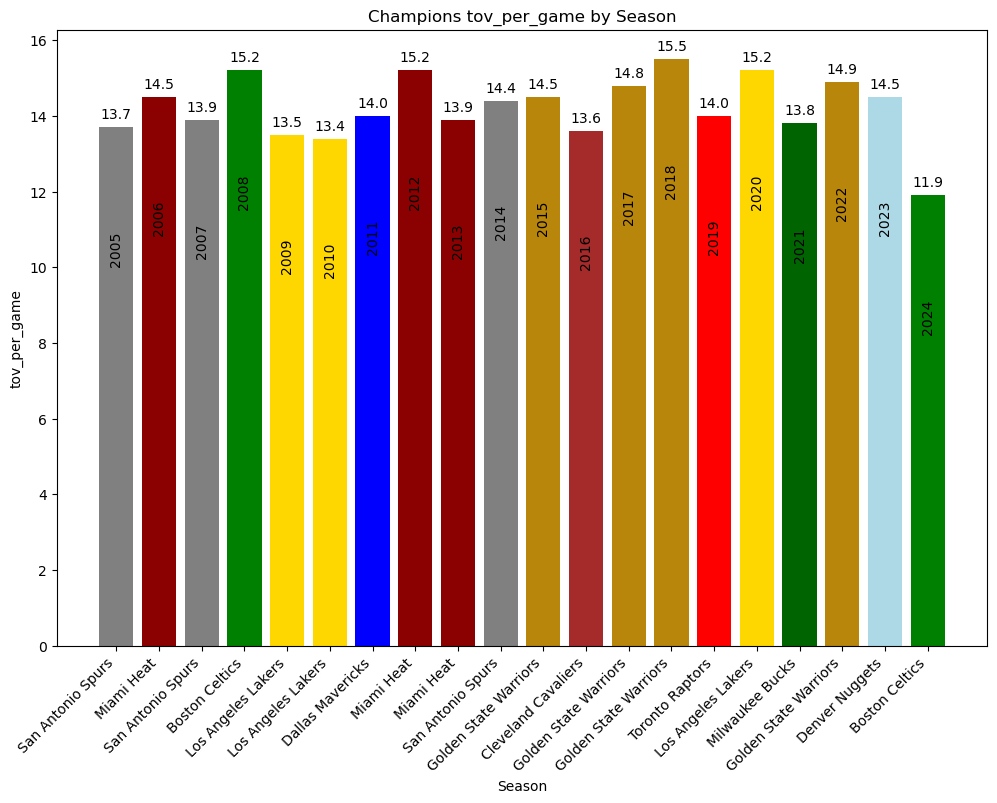

In [15]:
stats = ['fg_percent', 'x3p_percent', 'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game', 'tov_per_game']

for stat in stats:
    if stat == 'tov_per_game':
        team_stats['top'] = (
        team_stats.groupby('season')[stat].rank(ascending=True, method='min').fillna(0).astype(int))
    else:
        team_stats['top'] = (
        team_stats.groupby('season')[stat].rank(ascending=False, method='min').fillna(0).astype(int))
    champs = team_stats[(team_stats['champion']) & (team_stats['season'] >= 2005)].copy()
    print(champs[['season', 'team', stat, 'top']].reset_index(drop=True))

    fig, ax = plt.subplots(figsize = (12,8))
    colors = ['grey', 'darkred', 'grey', 'green', 'gold', 'gold', 'blue', 'darkred', 'darkred', 'grey', 'darkgoldenrod', 'brown',
         'darkgoldenrod', 'darkgoldenrod', 'red', 'gold', 'darkgreen', 'darkgoldenrod', 'lightblue', 'green']
    bars = ax.bar(champs['season'], champs[stat], color=colors)
    ax.set_xticks(champs['season'])
    ax.set_xticklabels((champs['team']), rotation=45, ha='right')
    ax.bar_label(bars, labels=champs['season'], padding=-100, rotation=90)
    ax.bar_label(bars, labels=champs[stat], padding=4)
    ax.set_xlabel('Season')
    ax.set_ylabel(stat)
    ax.set_title('Champions ' + str(stat) + ' by Season')
    plt.show()

The only stat category that showed a trend was field goal percentage. Other than the 2010 Los Angeles Lakers, all other champions finished in the top 10. Let's look at some other stats from team_summaries.

In [17]:
team_summaries_stats = team_summaries[team_summaries['season'] >= 2005]['team'].value_counts()
print(team_summaries_stats)
team_summaries = team_summaries.drop(team_summaries[team_summaries['team'] == 'League Average'].index)

team
Los Angeles Clippers                 21
League Average                       21
Phoenix Suns                         21
Minnesota Timberwolves               21
New York Knicks                      21
Orlando Magic                        21
Philadelphia 76ers                   21
Milwaukee Bucks                      21
Portland Trail Blazers               21
Sacramento Kings                     21
San Antonio Spurs                    21
Indiana Pacers                       21
Utah Jazz                            21
Washington Wizards                   21
Toronto Raptors                      21
Miami Heat                           21
Cleveland Cavaliers                  21
Houston Rockets                      21
Golden State Warriors                21
Detroit Pistons                      21
Memphis Grizzlies                    21
Chicago Bulls                        21
Denver Nuggets                       21
Boston Celtics                       21
Atlanta Hawks                      

In [18]:
team_summaries.columns

Index(['season', 'lg', 'team', 'abbreviation', 'playoffs', 'age', 'w', 'l',
       'pw', 'pl', 'mov', 'sos', 'srs', 'o_rtg', 'd_rtg', 'n_rtg', 'pace',
       'f_tr', 'x3p_ar', 'ts_percent', 'e_fg_percent', 'tov_percent',
       'orb_percent', 'ft_fga', 'opp_e_fg_percent', 'opp_tov_percent',
       'opp_drb_percent', 'opp_ft_fga', 'arena', 'attend', 'attend_g',
       'champion'],
      dtype='object')

In [19]:
team_summaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1788 entries, 1864 to 0
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1788 non-null   int64  
 1   lg                1788 non-null   object 
 2   team              1788 non-null   object 
 3   abbreviation      1788 non-null   object 
 4   playoffs          1788 non-null   bool   
 5   age               1729 non-null   float64
 6   w                 1787 non-null   float64
 7   l                 1787 non-null   float64
 8   pw                1787 non-null   float64
 9   pl                1787 non-null   float64
 10  mov               1787 non-null   float64
 11  sos               1787 non-null   float64
 12  srs               1787 non-null   float64
 13  o_rtg             1739 non-null   float64
 14  d_rtg             1739 non-null   float64
 15  n_rtg             1739 non-null   float64
 16  pace              1739 non-null   float64
 17  

In [20]:
stats = ['o_rtg', 'd_rtg', 'n_rtg']
def champ_stats(df, stat):
    for stat in stats:
        df[f'{stat}_top'] = (
        df.groupby('season')[stat].rank(ascending=False, method='min').fillna(0).astype(int))
    champs = df[(df['champion']) & (df['season'] >= 2005)].copy()
    result = champs[['season', 'team'] + sum([[stat, f'{stat}_top'] for stat in stats], [])].reset_index(drop=True)
    return result
champ_stats(team_summaries, stats)

,season,team,o_rtg,o_rtg_top,d_rtg,d_rtg_top,n_rtg,n_rtg_top
0,2005,San Antonio Spurs,107.5,8,98.8,30,8.7,1
1,2006,Miami Heat,108.7,7,104.5,21,4.2,6
2,2007,San Antonio Spurs,109.2,5,99.9,29,9.3,1
3,2008,Boston Celtics,110.2,9,98.9,30,11.3,1
4,2009,Los Angeles Lakers,112.8,3,104.7,25,8.1,3
5,2010,Los Angeles Lakers,108.8,11,103.7,27,5.1,6
6,2011,Dallas Mavericks,109.7,8,105.0,23,4.7,8
7,2012,Miami Heat,106.6,8,100.2,27,6.4,4
8,2013,Miami Heat,112.3,2,103.7,22,8.6,2
9,2014,San Antonio Spurs,110.5,6,102.4,28,8.1,1


Other than the 2022 Golden State Warriors, all champions were top 11 in offensive rating. Other than the 2023 Denver Nuggets, all champions finished in the top 11 in defensive rating (smaller numbers are better for defenisve rating). All champions finished in the top 10 in net rating. I want to look at opponent data now.

In [22]:
stats = ['opp_fg_percent', 'opp_fta_per_game', 'opp_pts_per_game']
def champ_stats(df, stat):
    for stat in stats:
        df[f'{stat}_top'] = (
        df.groupby('season')[stat].rank(ascending=True, method='min').fillna(0).astype(int))
    champs = df[(df['champion']) & (df['season'] >= 2005)].copy()
    result = champs[['season', 'team'] + sum([[stat, f'{stat}_top'] for stat in stats], [])].reset_index(drop=True)
    return result
champ_stats(opp_stats, stats)

,season,team,opp_fg_percent,opp_fg_percent_top,opp_fta_per_game,opp_fta_per_game_top,opp_pts_per_game,opp_pts_per_game_top
0,2005,San Antonio Spurs,0.426,3,23.8,6,88.4,1
1,2006,Miami Heat,0.440,8,27.1,19,96.0,13
2,2007,San Antonio Spurs,0.443,4,21.4,1,90.1,1
3,2008,Boston Celtics,0.419,1,26.3,23,90.3,2
4,2009,Los Angeles Lakers,0.447,6,23.5,11,99.3,13
5,2010,Los Angeles Lakers,0.446,5,21.7,2,97.0,9
6,2011,Dallas Mavericks,0.450,8,22.3,5,96.0,10
7,2012,Miami Heat,0.434,5,22.1,11,92.5,4
8,2013,Miami Heat,0.440,5,21.2,7,95.0,5
9,2014,San Antonio Spurs,0.444,8,20.6,4,97.6,6


It looks like other than the 2016 Cleveland Cavaliers and 2023 Denver Nuggets, all champions ranked in the top 8 in opponent field goal percentage (how well their opponent shot against them).

The past 20 champions (with some exceptions) finished in the top:
- 15 in Points per Game
- 10 in Field Goal Percentage
- 11 in Offensive Rating
- 11 in Defensive Rating
- 10 in Net Rating
- 8 in Opponent Field Goal Percentage

How significant was a stat to winning a championship?

In [54]:
from scipy.stats import ttest_ind

team_stats['champion'] = team_stats['champion'].fillna(False)
group1 = team_stats[team_stats['champion'] == True]['pts_per_game']
group2 = team_stats[team_stats['champion'] == False]['pts_per_game']
group1 = group1.dropna()
group2 = group2.dropna()

t_stat, p_val = ttest_ind(group1, group2)
print(p_val)

105.92179487179487
103.6733762434172
0.045049289937281294


A p-value less than 0.05 indicates a significant relationship between a stat and winning a championship. In this case, scoring more points is associated with winning a championship.

I'm interested in looking at the biggest rivalry in NBA history, the Boston Celtics vs the Los Angeles Lakers. The Celtics have been a team since 1947 where the Lakers started as the Minneapolis Lakers in 1949. We first need to merge the LA Lakers with the Minneapolis Lakers.

In [27]:
minneapolis = team_summaries[team_summaries['team']=='Minneapolis Lakers']
los_angeles = team_summaries[team_summaries['team']=='Los Angeles Lakers']
lakers = pd.concat([minneapolis, los_angeles], axis=0, ignore_index=True)
celtics = team_summaries[team_summaries['team']=='Boston Celtics']

pd.set_option('display.max_rows', None)
print(lakers)

    season   lg                team abbreviation  playoffs   age     w     l  \
0     1949  BAA  Minneapolis Lakers          MNL      True   NaN  44.0  16.0   
1     1950  NBA  Minneapolis Lakers          MNL      True   NaN  51.0  17.0   
2     1951  NBA  Minneapolis Lakers          MNL      True   NaN  44.0  24.0   
3     1952  NBA  Minneapolis Lakers          MNL      True  25.9  40.0  26.0   
4     1953  NBA  Minneapolis Lakers          MNL      True  26.5  48.0  22.0   
5     1954  NBA  Minneapolis Lakers          MNL      True  27.3  46.0  26.0   
6     1955  NBA  Minneapolis Lakers          MNL      True  26.8  40.0  32.0   
7     1956  NBA  Minneapolis Lakers          MNL      True  26.8  33.0  39.0   
8     1957  NBA  Minneapolis Lakers          MNL      True  25.5  34.0  38.0   
9     1958  NBA  Minneapolis Lakers          MNL     False  25.9  19.0  53.0   
10    1959  NBA  Minneapolis Lakers          MNL      True  25.7  33.0  39.0   
11    1960  NBA  Minneapolis Lakers     

Let's look at wins over the years between the two teams.

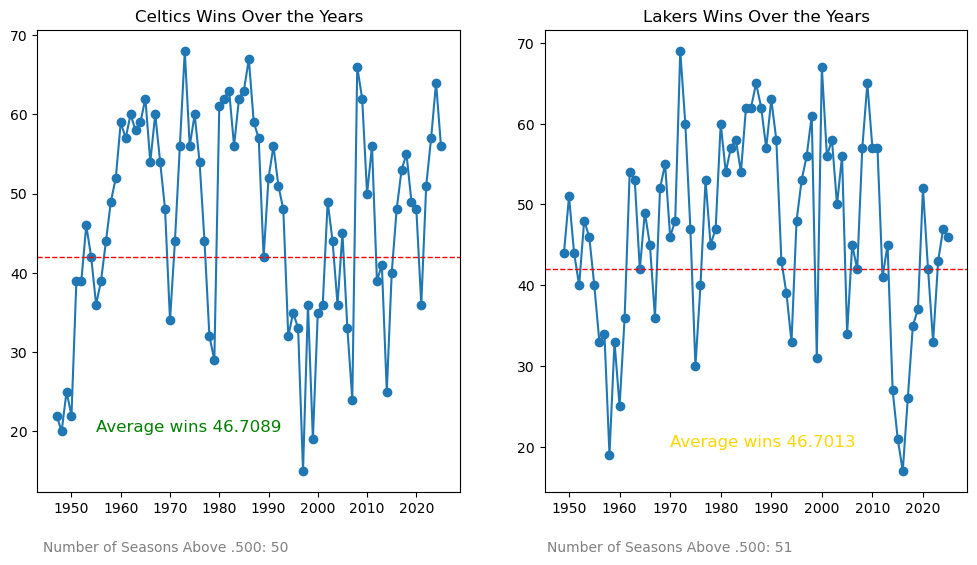

In [29]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(celtics['season'], celtics['w'], marker='o')
ax1.set_title('Celtics Wins Over the Years')
ax1.text(1955, 20, 'Average wins ' + str(round(celtics['w'].mean(),4)), fontsize=12, color='green')
ax1.axhline(y=42, color='red', linestyle='--', linewidth=1)
fig.text(0.13,0.01, 'Number of Seasons Above .500: ' + str((celtics['w']>42).sum()), ha='left', fontsize=10, color='gray')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(lakers['season'], lakers['w'], marker='o')
ax2.set_title('Lakers Wins Over the Years')
ax2.text(1970, 20, 'Average wins ' + str(round(lakers['w'].mean(),4)), fontsize=12, color='gold')
ax2.axhline(y=42, color='red', linestyle='--', linewidth=1)
fig.text(0.55,0.01, 'Number of Seasons Above .500: ' + str((lakers['w']>42).sum()), ha='left', fontsize=10, color='gray')

plt.show()

The two teams average wins are practically identical. The Celtics have been a team for two more seasons, but the Lakers have more seasons above a .500 win percentage. Winning in the regular season is good, but all that matters is winning the playoffs.

In [31]:
print('Number of times the Celtics made the playoffs: ' + str(celtics['playoffs'].sum()) + '. Which led to ' + str(celtics['champion'].sum())
     + ' championships')
print('Number of times the Lakers made the playoffs: ' + str(lakers['playoffs'].sum()) + '. Which led to ' + str(lakers['champion'].sum())
     + ' championships')

Number of times the Celtics made the playoffs: 60. Which led to 18 championships
Number of times the Lakers made the playoffs: 63. Which led to 17 championships


Let's take a look at scoring and other stats over the years.

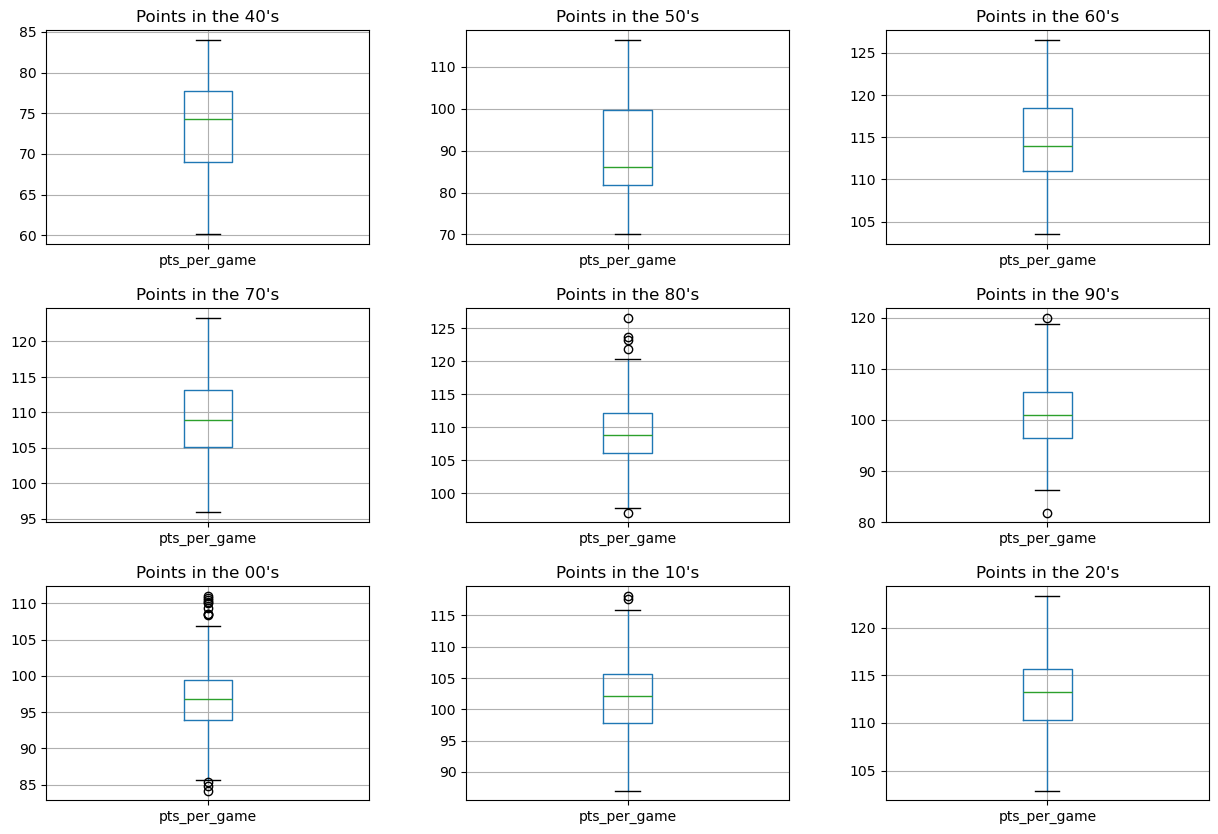

In [33]:
decades = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

fig = plt.figure(figsize=(15,10))
subplot_index=1
for decade in decades:
    ax = fig.add_subplot(3, 3, subplot_index)
    team_stats[(team_stats['season'] >= decade) & (team_stats['season'] < decade + 10)].boxplot(column='pts_per_game', ax=ax)
    ax.set_title('Points in the ' + str(decade)[2:] + '\'s')
    subplot_index+=1
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

It's interesting to see that in the 60's, more points per game were being scored than today. Let's look at some other stats to determine if there's a potential reason.

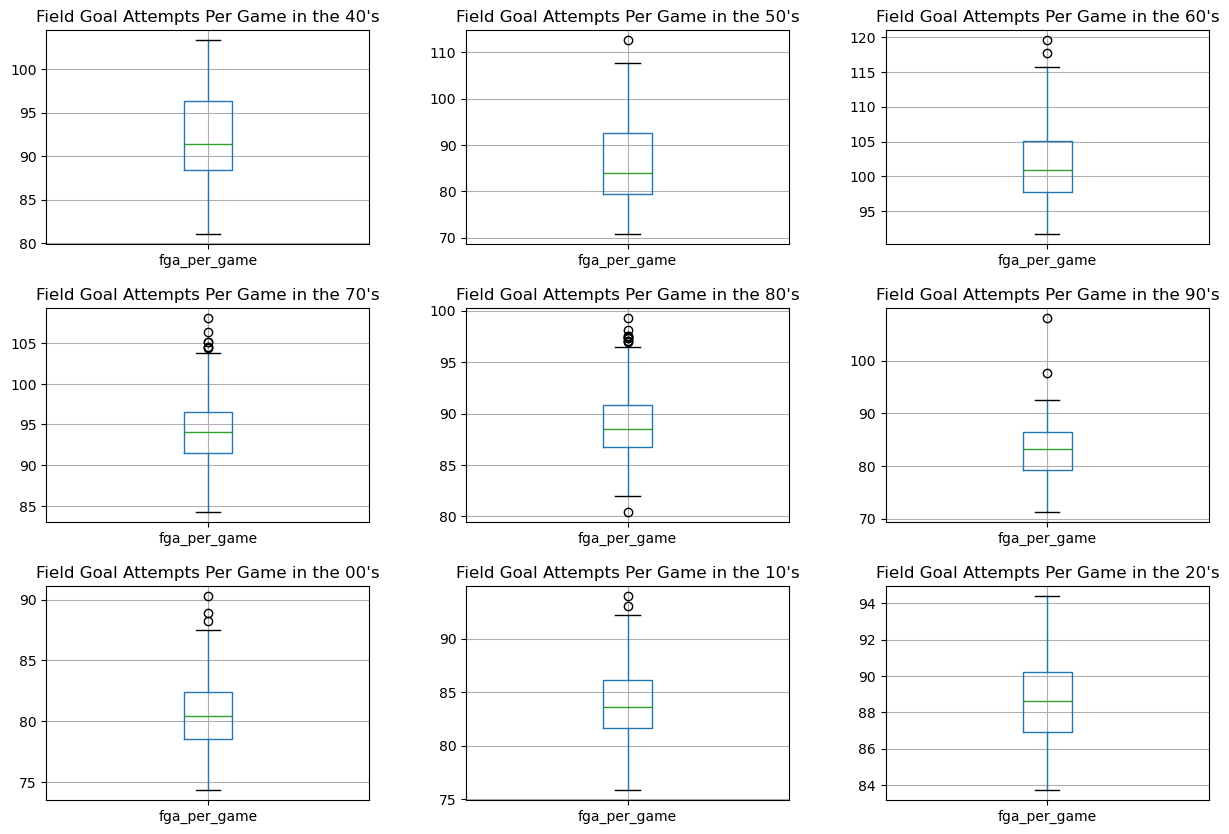

In [35]:
decades = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

fig = plt.figure(figsize=(15,10))
subplot_index=1
for decade in decades:
    ax = fig.add_subplot(3, 3, subplot_index)
    team_stats[(team_stats['season'] >= decade) & (team_stats['season'] < decade + 10)].boxplot(column='fga_per_game', ax=ax)
    ax.set_title('Field Goal Attempts Per Game in the ' + str(decade)[2:] + '\'s')
    subplot_index+=1
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

# Conclusion
This is an ongoing project that I plan on building on and adding insights at the end of each test.